In [1]:
import pandas as pd
import numpy as np
import os
from keras.preprocessing.image import load_img
import cv2
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

Using TensorFlow backend.


In [2]:
os.listdir()

['classifier.py',
 '.DS_Store',
 'train_model.py',
 'prepare_data.py',
 'face_not_matched.png',
 'model.xml',
 'README.md',
 'haarcascade_frontalface_default.xml',
 '.ipynb_checkpoints',
 '.git',
 'test.ipynb',
 'face_recognize_correct.png',
 'faces',
 '.idea']

In [3]:
ROOT_DIR = './faces/'
person_folder = ['yogesh', 'rohan']

In [4]:
# Load Dataset
faces_data = {}

for person in person_folder:
    person_dir = os.path.join(ROOT_DIR, person)
    print(person_dir)
    faces_data[person] = []
    
    for face_id in os.listdir(person_dir)[0:10]:
        face = os.path.join(person_dir, face_id)
        _img = cv2.imread(face, cv2.IMREAD_GRAYSCALE)
        faces_data[person].append(_img)

./faces/yogesh
./faces/rohan


In [5]:
list(faces_data.keys())

['yogesh', 'rohan']

In [6]:
data_set = []
def pair_data(faces_data):
    persons = list(faces_data.keys())
    for person1 in persons:
        for person2 in persons:
            if person1 == person2:
                for i in range(0,10):
                    data_set.append([faces_data[person1][i], faces_data[person2][i], 1])
            else: 
                for i in range(0,10):
                    data_set.append([faces_data[person1][i], faces_data[person2][i], 0])
    return data_set

In [7]:
data_set_prepared = pair_data(faces_data)

In [8]:
random.shuffle(data_set)

In [9]:
x1 = []
x2 = []
target = []

In [10]:
for data_set_ in data_set:
    x1.append(data_set_[0])
    x2.append(data_set_[1])
    target.append(data_set_[2])

In [11]:
len(x1), len(x2), len(target)

(40, 40, 40)

same person
same person
same person


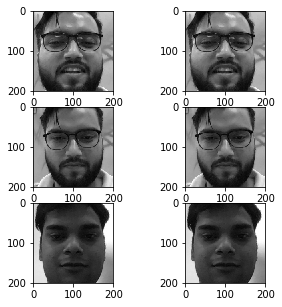

In [12]:
plt.figure(figsize=(5,5))
count = 1
for i in range(0,3):
    plt.subplot(3,2, count)
    plt.imshow(x1[i], cmap='gray')
    count += 1
    plt.subplot(3,2, count)
    plt.imshow(x2[i], cmap='gray')
    count += 1
    print('same person' if target[i] else 'different person')
plt.show()